# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import linear_rainbow
from statsmodels.stats.api import het_goldfeldquandt
from sklearn.linear_model import LinearRegression, SGDRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.impute import KNNImputer
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures

/Users/adi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 2. Collect and load data

In [2]:
df=pd.read_csv('bigcity.csv')

In [3]:
df.head()

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


# 3. Explore numeric variables - five number summary

In [5]:
df[['u','x']].describe()   #explains to us how the numerical data is distributed(a summary of it)

,u,x
count,49.000000,49.000000
mean,103.142857,127.795918
std,104.405061,123.121211
min,2.000000,46.000000
25%,43.000000,58.000000
50%,64.000000,79.000000
75%,120.000000,130.000000
max,507.000000,634.000000


In [ ]:
mean of our independent variable is 103.14 and standard deviation is 104.405

# 3a. Visualize numeric variables in boxplot and histograms
# 3b. Measure spread – variance and standard deviation

In [8]:
df['Unnamed: 0'].value_counts()  #all unique, like indexes and hence we drop it

49    1
24    1
22    1
21    1
20    1
19    1
18    1
17    1
16    1
15    1
14    1
13    1
12    1
11    1
10    1
9     1
8     1
7     1
6     1
5     1
4     1
3     1
2     1
23    1
25    1
48    1
26    1
47    1
46    1
45    1
44    1
43    1
42    1
41    1
40    1
39    1
38    1
37    1
36    1
35    1
34    1
33    1
32    1
31    1
30    1
29    1
28    1
27    1
1     1
Name: Unnamed: 0, dtype: int64

In [9]:
df.drop('Unnamed: 0',1,inplace=True)

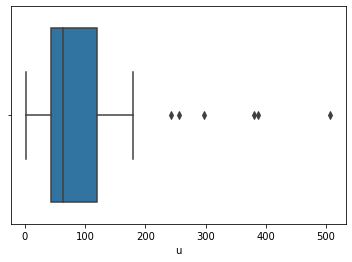

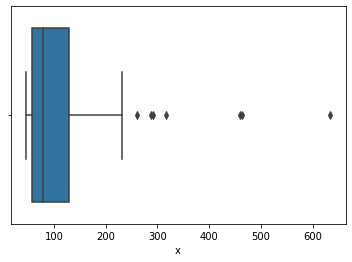

In [10]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()   #a few outliers are present

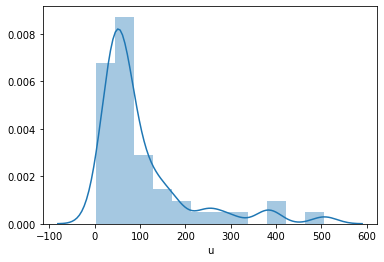

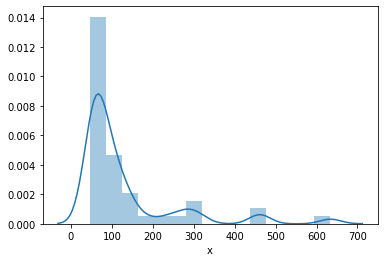

In [12]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()   #both our independent and dependent variables are right skewed

In [13]:
print('standard deviation of independent variable is >---',np.std(df['u']))
print('standard deviation of dependent variable is >---',np.std(df['x']))

standard deviation of independent variable is >--- 103.33421110006823
standard deviation of dependent variable is >--- 121.85839550383406


In [15]:
print('variance of independent variable is >---',np.var(df['u']))
print('variance of dependent variable is >---',np.var(df['x']))

variance of independent variable is >--- 10677.959183673465
variance of dependent variable is >--- 14849.468554768846


# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

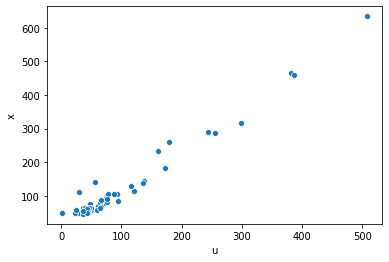

In [17]:
sns.scatterplot(df['u'],df['x'])   #we can see a linear relationship

# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [19]:
x=df['u']
y=df['x']

In [20]:
x.skew()  #highly skewed 

2.255275603839222

In [21]:
y.skew()   #highly skewed

2.4929020374730873

In [22]:
df.shape  #49 rows and 2 columns

(49, 2)

In [24]:
x.shape

(49,)

In [25]:
y.shape

(49,)

# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [26]:
df.isnull().sum()   #no null values in the dataset

u    0
x    0
dtype: int64

In [27]:
df.corr()   #highly correlated as the correlation coefficient is 0.9817

,u,x
u,1.000000,0.981742
x,0.981742,1.000000


In [ ]:
highly positively correlated and hence we can say that the predictor variable or the independent variable u is a 
good predictor of our target or response variable x

The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [28]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=48)

In [29]:
xtrain.shape

(39,)

In [30]:
xtest.shape

(10,)

In [31]:
ytrain.shape

(39,)

In [32]:
ytest.shape

(10,)

# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [35]:
x=x.values.reshape(-1,1)
y=y.values.reshape(-1,1)

In [38]:
x=pd.DataFrame(x)
y=pd.DataFrame(y)

In [41]:
lr=LinearRegression()
lr.fit(x,y)

LinearRegression()

In [43]:
lr.intercept_   #b0 value ie intercept

array([8.38395633])

In [44]:
lr.coef_   #b1 value ie coef value of our independent variable

array([[1.1577337]])

In [50]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=48)

In [52]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [59]:
lr.coef_

array([[1.18985296]])

In [62]:
lr.intercept_   #b0

array([2.31035285])

# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

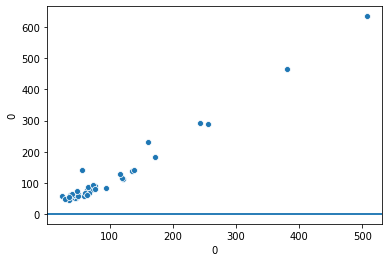

In [79]:
sns.scatterplot(xtrain[0],ytrain[0])
plt.axhline(lr.coef_)
plt.axhline(lr.intercept_)
plt.show()

# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [81]:
ypred_test=lr.predict(xtest)
r2_score(ytest,ypred_test)  #r2 value is 0.933

0.9330538126741318

In [84]:
np.sqrt(mean_squared_error(ytest,ypred_test))  

33.95921689487069

In [85]:
ypred_train=lr.predict(xtrain)
r2_score(ytrain,ypred_train)   #training data r2 is 0.97

0.9709915109809382

In [86]:
np.sqrt(mean_squared_error(ytrain,ypred_train))   #rmse for train data is lesser

20.069356609136225

# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [91]:
lr.score(xtrain,ytrain)  #score of training data

0.9709915109809382

In [92]:
lr.score(xtest,ytest)    #score of testing data

0.9330538126741318

In [94]:
sc=StandardScaler()
x=sc.fit_transform(x)
y=sc.fit_transform(y)

In [96]:
x=pd.DataFrame(x)
y=pd.DataFrame(y)

In [98]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=48)

In [100]:
lasso=Lasso(alpha=0.01)
lasso.fit(x,y)

Lasso(alpha=0.01)

In [101]:
ypred_train_lasso=lasso.predict(xtrain)
r2_score(ytrain,ypred_train_lasso)   #training r2

0.9690324226456751

In [102]:
ypred_test_lasso=lasso.predict(xtest)
r2_score(ytest,ypred_test_lasso)   #much better r2 score after perfoming lasso regularization
#testing r2

0.9440913123743306

In [103]:
#training rmse
np.sqrt(mean_squared_error(ytrain,ypred_train_lasso))

0.170164536821124

In [104]:
np.sqrt(mean_squared_error(ytest,ypred_test_lasso))  #still there is a difference in rmse

0.25467067303439206

In [ ]:
#as we have only one feature we cant reduce any more feature in order to reduce our rmse

In [105]:
lasso.score(xtrain,ytrain)   #r2 for training data

0.9690324226456751

In [106]:
lasso.score(xtest,ytest)  #r2 score for testing data

0.9440913123743306

In [ ]:
there is an improvement using lasso

# THE END